# Direct Marketing Optimization

Introduction:

Method:

### Read data:

In [15]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go

In [16]:
dt_Soc_Dem = pd.read_excel("../data/Task_ML_Engineer_Dataset.xlsx", sheet_name="Soc_Dem")
print("Shape: {}".format(dt_Soc_Dem.shape))
print("NAs:\n{}".format(dt_Soc_Dem.isna().sum()))
dt_Soc_Dem.head()

Shape: (1615, 4)
NAs:
Client    0
Sex       3
Age       0
Tenure    0
dtype: int64


Client Sex  Age  Tenure
0     909   M   21      27
1    1217   M   38     165
2     850   F   49      44
3    1473   M   54      34
4    1038   M   29     106

In [17]:
k = pd.factorize(dt_Soc_Dem["Sex"])
k

(array([0, 0, 1, ..., 0, 1, 0], dtype=int64),
 Index(['M', 'F'], dtype='object'))

In [18]:
dt_Soc_Dem = pd.get_dummies(dt_Soc_Dem,prefix=["Sex"])
dt_Soc_Dem

Client  Age  Tenure  Sex_F  Sex_M
0        909   21      27      0      1
1       1217   38     165      0      1
2        850   49      44      1      0
3       1473   54      34      0      1
4       1038   29     106      0      1
5        225   14     187      0      1
6        699   37     175      0      1
7        827   57      50      0      1
8       1231    6     232      1      0
9        528   19      70      1      0
10      1145   61      45      0      1
11       739   69      55      0      1
12       956   52     139      0      1
13       517   41      28      1      0
14      1219   33      19      0      1
15      1475   59      20      1      0
16       175   41      61      1      0
17       137   63     168      1      0
18       316    1     211      1      0
19       461   17      64      1      0
20      1048   65      71      1      0
21       123   22      40      1      0
22      1574   30     149      1      0
23      1160   19     260      0      1
24      1083   39      12      1      0
25        36   49     263      1      0
26      1134   35      96      1      0
27       191   59     150      0      1
28       689   39     133      1      0
29       390   50      67      0      1
...      ...  ...     ...    ...    ...
1585     765   44      66      1      0
1586     124   68      47      0      1
1587     162   51     123      1      0
1588    1376   20      36      1      0
1589     193   64     181      1      0
1590    1025   55      35      0      1
1591     600   50     150      0      1
1592     456   66      18      0      1
1593    1239   27      26      1      0
1594    1500   33      15      1      0
1595     172   56     188      1      0
1596    1026   70      69      0      1
1597     809   30     157      0      1
1598     419   33      82      1      0
1599    1012   23      99      1      0
1600    1024   65      13      0      1
1601     424   40      31      1      0
1602    1171   27     119      1      0
1603     195   65     162      0      1
1604    1282   23      68      0      1
1605     833   36     150      0      1
1606     573   56      77      1      0
1607     621   37     152      1      0
1608     464   68     153      0      1
1609    1276   28     145      0      1
1610     409   31      91      0      1
1611     384   23     160      0      1
1612     977   46      59      0      1
1613     629   61     173      1      0
1614    1466   63      97      0      1

[1615 rows x 5 columns]

In [19]:
dt_Products_ActBalance = pd.read_excel("../data/Task_ML_Engineer_Dataset.xlsx", sheet_name="Products_ActBalance")
print("Shape: {}".format(dt_Products_ActBalance.shape))
print("NAs:\n{}".format(dt_Products_ActBalance.isna().sum()))
dt_Products_ActBalance = dt_Products_ActBalance.fillna(0)
dt_Products_ActBalance.head()

Shape: (1615, 13)
NAs:
Client           0
Count_CA         0
Count_SA      1189
Count_MF      1309
Count_OVD     1196
Count_CC      1445
Count_CL      1480
ActBal_CA        0
ActBal_SA     1189
ActBal_MF     1309
ActBal_OVD    1196
ActBal_CC     1445
ActBal_CL     1480
dtype: int64


Client  Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL  \
0       1         1       0.0       0.0        1.0       0.0       0.0   
1       2         1       1.0       0.0        0.0       0.0       0.0   
2       3         1       0.0       1.0        0.0       0.0       0.0   
3       4         1       1.0       0.0        0.0       1.0       0.0   
4       5         1       1.0       0.0        0.0       0.0       0.0   

     ActBal_CA     ActBal_SA   ActBal_MF  ActBal_OVD    ActBal_CC  ActBal_CL  
0  1333.802857      0.000000    0.000000         0.0     0.000000        0.0  
1   110.768571  13326.190357    0.000000         0.0     0.000000        0.0  
2   482.654643      0.000000  107.251786         0.0     0.000000        0.0  
3  1599.840714     76.437143    0.000000         0.0  1110.381786        0.0  
4  5353.483929   8079.715714    0.000000         0.0     0.000000        0.0

In [20]:
dt_Inflow_Outflow = pd.read_excel("../data/Task_ML_Engineer_Dataset.xlsx", sheet_name="Inflow_Outflow")
print("Shape: {}".format(dt_Inflow_Outflow.shape))
print("NAs:\n{}".format(dt_Inflow_Outflow.isna().sum()))
dt_Inflow_Outflow.head()

Shape: (1587, 15)
NAs:
Client                          0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
dtype: int64


Client   VolumeCred  VolumeCred_CA  TransactionsCred  TransactionsCred_CA  \
0    1017     0.005000       0.005000                 1                    1   
1    1456   364.772143     364.752857                 4                    3   
2     545  2471.719286    2471.719286                14                   14   
3     667  1127.792857    1127.792857                 4                    4   
4    1381   571.618214     571.618214                 3                    3   

     VolumeDeb  VolumeDeb_CA  VolumeDebCash_Card  VolumeDebCashless_Card  \
0   118.046429    118.046429           25.000000               91.796429   
1   774.980000    774.980000           14.285714              497.444286   
2  2190.257143   2190.257143          303.571429              179.082143   
3  1344.603571   1344.603571          642.857143              194.285714   
4    57.071429     57.071429           10.714286               46.357143   

   VolumeDeb_PaymentOrder  TransactionsDeb  TransactionsDeb_CA  \
0                0.000000               12                  12   
1              258.607143               28                  28   
2             1229.428571               23                  23   
3              249.321429               21                  21   
4                0.000000                6                   6   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  \
0                         2                             9   
1                         1                            20   
2                         3                             5   
3                         3                             4   
4                         1                             5   

   TransactionsDeb_PaymentOrder  
0                             0  
1                             5  
2                            12  
3                             8  
4                             0

In [21]:
dt_Sales_Revenues = pd.read_excel("../data/Task_ML_Engineer_Dataset.xlsx", sheet_name="Sales_Revenues")
print("Shape: {}".format(dt_Sales_Revenues.shape))
print("NAs:\n{}".format(dt_Sales_Revenues.isna().sum()))
dt_Sales_Revenues.head()

Shape: (969, 7)
NAs:
Client        0
Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64


Client  Sale_MF  Sale_CC  Sale_CL  Revenue_MF  Revenue_CC  Revenue_CL
0    1094        0        1        0    0.000000    5.138571      0.0000
1    1484        1        0        1   25.609107    0.000000      8.7225
2      20        0        1        0    0.000000    3.822500      0.0000
3    1193        0        0        0    0.000000    0.000000      0.0000
4     142        0        0        0    0.000000    0.000000      0.0000

In [22]:
dt = pd.merge(dt_Soc_Dem, dt_Sales_Revenues, on="Client", how="inner") # outer or inner?
dt = pd.merge(dt, dt_Products_ActBalance, on="Client", how="inner")
dt = pd.merge(dt, dt_Inflow_Outflow, on="Client", how="inner")
print("Shape: {}".format(dt.shape))
print("NAs:\n{}".format(dt.isna().sum()))
dt = dt.dropna()
print("Shape: {}".format(dt.shape))
print("NAs:\n{}".format(dt.isna().sum()))
dt.head()

Shape: (951, 37)
NAs:
Client                          0
Age                             0
Tenure                          0
Sex_F                           0
Sex_M                           0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA              

Client  Age  Tenure  Sex_F  Sex_M  Sale_MF  Sale_CC  Sale_CL  Revenue_MF  \
0    1217   38     165      0      1        0        0        0    0.000000   
1     850   49      44      1      0        0        1        0    0.000000   
2    1473   54      34      0      1        1        0        0    4.929643   
3    1038   29     106      0      1        0        0        0    0.000000   
4     225   14     187      0      1        0        0        1    0.000000   

   Revenue_CC  ...    VolumeDeb  VolumeDeb_CA  VolumeDebCash_Card  \
0    0.000000  ...   714.285714    714.285714            0.000000   
1    0.893929  ...  1226.345357   1226.345357            0.000000   
2    0.000000  ...  3875.137857   3794.580714          357.142857   
3    0.000000  ...     0.000000      0.000000            0.000000   
4    0.000000  ...   130.521429    130.521429            0.000000   

   VolumeDebCashless_Card  VolumeDeb_PaymentOrder  TransactionsDeb  \
0                0.000000              714.285714                1   
1                0.000000              121.928571                6   
2              444.597500             2076.785714               48   
3                0.000000                0.000000                0   
4              111.235714               19.285714                5   

   TransactionsDeb_CA  TransactionsDebCash_Card  TransactionsDebCashless_Card  \
0                   1                         0                             0   
1                   6                         0                             0   
2                  38                         1                            26   
3                   0                         0                             0   
4                   5                         0                             4   

   TransactionsDeb_PaymentOrder  
0                             1  
1                             1  
2                            11  
3                             0  
4                             1  

[5 rows x 37 columns]

In [ ]:
for column in dt.columns:
    print(column)

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

def plot_boxplot(title, x_data):
    y_data = []
    colors = []
    color_palette = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
              'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
    for idx, column in enumerate(x_data):        
        if column not in ["Client", "Sex"]:
            y_data.append(dt[column])
            colors.append(color_palette[idx % len(color_palette)])

#     colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
#               'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)'] * 1
    traces = []

    for xd, yd, cls in zip(x_data, y_data, colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
    #             boxpoints = 'all',    
                boxpoints = 'suspectedoutliers',
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=cls,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1),
            ))

    layout = go.Layout(
        title=title,
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=5,
            gridcolor='rgb(255, 255, 255)',
            gridwidth=1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        showlegend=False
    )

    fig = go.Figure(data=traces, layout=layout)
    return fig    

In [ ]:
volumes_list = [s for s in dt.columns if "Volume" in s]

# TODO: lists: "Volume", "Count", "ActBal", "Transactions", "Sale", "Revenue"
# TODO: train, val, test with clients that have "bought stuff". SUGGEST clients that don't have any and r predicted with some confidence interval

fig = plot_boxplot("Volume", volumes_list)
# py.iplot(fig)

In [ ]:
volumes_list = [s for s in dt.columns if "Count" in s]

# TODO: lists: "Volume", "Count", "ActBal", "Transactions", "Sale", "Revenue"
# TODO: train, val, test with clients that have "bought stuff". SUGGEST clients that don't have any and r predicted with some confidence interval

fig = plot_boxplot("Volume", volumes_list)
# py.iplot(fig)

In [ ]:
volumes_list = [s for s in dt.columns if "ActBal" in s]

# TODO: lists: "Volume", "Count", "ActBal", "Transactions", "Sale", "Revenue"
# TODO: train, val, test with clients that have "bought stuff". SUGGEST clients that don't have any and r predicted with some confidence interval

fig = plot_boxplot("Volume", volumes_list)
# py.iplot(fig)

In [ ]:
volumes_list = [s for s in dt.columns if "Transactions" in s]

# TODO: lists: "Volume", "Count", "ActBal", "Transactions", "Sale", "Revenue"
# TODO: train, val, test with clients that have "bought stuff". SUGGEST clients that don't have any and r predicted with some confidence interval

fig = plot_boxplot("Volume", volumes_list)
# py.iplot(fig)

In [ ]:
volumes_list = [s for s in dt.columns if "Sale" in s]

# TODO: lists: "Volume", "Count", "ActBal", "Transactions", "Sale", "Revenue"
# TODO: train, val, test with clients that have "bought stuff". SUGGEST clients that don't have any and r predicted with some confidence interval

fig = plot_boxplot("Volume", volumes_list)
# py.iplot(fig)

In [ ]:
volumes_list = [s for s in dt.columns if "Revenue" in s]

# TODO: lists: "Volume", "Count", "ActBal", "Transactions", "Sale", "Revenue"
# TODO: train, val, test with clients that have "bought stuff". SUGGEST clients that don't have any and r predicted with some confidence interval

fig = plot_boxplot("Volume", volumes_list)
# py.iplot(fig)

Clean up data:

In [ ]:
dt[["Sex_M"]].head()

s = pd.Series(dt["Sex_M"])
s.head()
k = pd.get_dummies(s)
f, m = k.sum()
print(f, m)


In [ ]:
pd.get_dummies(pd.Series(dt["Sex_M"])).head()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ["Male", "Female"]
f, m = pd.Series(dt["Sex_F"]).sum(), pd.Series(dt["Sex_M"]).sum()
values = [f, m]
trace = go.Pie(labels=labels, values=values)
fig = go.Figure(data=[trace])
py.iplot(fig)

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x = np.random.randn(500)
data = [go.Histogram(x=x)]

py.iplot(data, filename='basic histogram')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x = dt.Tenure
data = [go.Histogram(x=x)]

py.iplot(data, filename='basic histogram')

### Train / Validate / Test split:

TODO: fill missing values from some columns (with zeros probably)

Logistic regression:

In [ ]:
sales_list = [s for s in dt.columns if "Sale" in s]
sales_list.append("Sex")
revenue_list = [s for s in dt.columns if "Revenue" in s]
sales_list = sales_list + revenue_list

X = dt.loc[:, ~dt.columns.isin(sales_list)]
print("X.shape: {}".format(X.shape[0]))
X = dt.loc[:, ~dt.columns.isin(sales_list)].dropna()
print("X.shape: {}".format(X.shape[0]))

In [25]:
import numpy as np
import sklearn as s
from sklearn import svm  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd  
import matplotlib.pyplot as plt
import os

dt_train, dt_test = train_test_split(dt, test_size=0.2)

counts_list = [s for s in dt.columns if "Count" in s]
acts_list = [s for s in dt.columns if "Act" in s]
volume_list = [s for s in dt.columns if "Volume" in s]
transactions_list = [s for s in dt.columns if "Transaction" in s]
sales_list = [s for s in dt.columns if "Sale" in s]
revenues_list = [s for s in dt.columns if "Revenue" in s]
X_list = counts_list + acts_list + volume_list + transactions_list
X_list = X_list  + ["Age", "Tenure", "Sex_M", "Sex_F"]

# X = dt.loc[:, dt.columns.isin(X_list)]
X_train = dt_train.loc[:, dt_train.columns.isin(X_list)]
X_test = dt_test.loc[:, dt_test.columns.isin(X_list)]

y_binary_classification_labels = ["Sale_MF", "Sale_CC", "Sale_CL"]
y_regression_labels = ["Revenue_MF", "Revenue_CC", "Revenue_CL"]

predictors = {}

for y_label in y_binary_classification_labels:
# y_label = "Sale_MF"
    print("== Label: {}".format(y_label))
    y_train = dt_train[y_label]
    y_test = dt_test[y_label]

    print("=== Shapes: X_train {}, X_test{}, y_train {}, y_test {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    
    fpr_list = []
    tpr_list = []
    roc_auc_list = []
    cm_list = []

    methods = ["lr", "svm", "rf", "mlp"]
#     actual = y.iloc[460:]
    for method in methods:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        if method == "lr":
            LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train.values, y_train.values)
#             prediction_results = LR.predict(X.iloc[460:,:]) 
            prediction_results = LR.decision_function(X_test) 
            print("Method: {} score: {}".format(method, round(LR.score(X_test, y_test), 4)))
            cm = confusion_matrix(y_test, prediction_results)
            print("{}: confusion matrix: {}".format(method, cm))
            fpr, tpr, _ = roc_curve(prediction_results, y_test)
            roc_auc = auc(fpr, tpr)        
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            roc_auc_list.append(roc_auc)
            cm_list.append(cm)
        elif method == "mlp":
            NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
            NN.fit(X_train.values, y_train.values)
#             prediction_results = NN.predict(X.iloc[460:,:])
            prediction_results = NN.decision_function(X_test)
            print("Method: {} score: {}".format(method, round(NN.score(X_test, y_test), 4)))        
            cm = confusion_matrix(y_test, prediction_results)
            print("{}: confusion matrix: {}".format(method, cm))
            fpr, tpr, _ = roc_curve(prediction_results, y_test)
            roc_auc = auc(fpr, tpr)        
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            roc_auc_list.append(roc_auc)
            cm_list.append(cm)
        elif method == "rf":
            RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
            RF.fit(X_train.values, y_train.values)
#             prediction_results = RF.predict(X.iloc[460:,:])
            prediction_results = RF.decision_function(X_test)
            print("Method: {} score: {}".format(method, round(RF.score(X_test, y_test), 4)))              
            feature_importances = sorted(zip(RF.feature_importances_, X_train.columns))[::-1]
            print("{} Feature importance:".format(method))
            for values in feature_importances:
                print(values)
            cm = confusion_matrix(y_test, prediction_results)
            print("{}: confusion matrix: {}".format(method, cm))
            fpr, tpr, _ = roc_curve(prediction_results, y_test)
            roc_auc = auc(fpr, tpr)        
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            roc_auc_list.append(roc_auc)
            cm_list.append(cm)
        elif method == "svm":
            SVM = svm.LinearSVC()  
            SVM.fit(X_train.values, y_train.values)
#             prediction_results = SVM.predict(X.iloc[460:,:])  
            prediction_results = SVM.decision_function(X_test) 
            print("Method: {} score: {}".format(method, round(SVM.score(X_test, y_test), 4)))
            cm = confusion_matrix(y_test, prediction_results)
            print("{}: confusion matrix: {}".format(method, cm))
            fpr, tpr, _ = roc_curve(prediction_results, y_test)
            roc_auc = auc(fpr, tpr)        
            fpr_list.append(fpr)
            tpr_list.append(tpr)
            roc_auc_list.append(roc_auc)
            cm_list.append(cm)
            
    predictors[y_label] = {"fpr": fpr_list, "tpr": tpr_list, "roc_auc": roc_auc_list, "cm": cm_list}

== Label: Sale_MF
=== Shapes: X_train (760, 30), X_test(191, 30), y_train (760,), y_test (191,)
Method: lr score: 0.8168


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
prediction_results2 = np.transpose(np.array(prediction_results))
y_test2 = np.transpose(np.array(y_test))
fpr, tpr, _ = roc_curve(prediction_results2, y_test2)
print(fpr.shape, y_test.shape, prediction_results.shape)

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
print(X_test.shape, X_train.shape)

In [ ]:
fpr, tpr, _ = roc_curve(y_test2[:], prediction_results2[:])
print(fpr.shape, y_test.shape, prediction_results.shape)

In [ ]:
dt_train, dt_test = train_test_split(dt, test_size=0.2)
dt_train.drop( dt_train[dt_train["Revenue_CC"] == 0 ].index , inplace=True)
dt_train["Revenue_CC"].head(10)

In [ ]:
dt2 = dt.copy()
dt2.drop( dt2[dt2["Revenue_CC"] > 0 ].index , inplace=True)
print("dt2 shape: {}".format(dt2.shape))
dt2["Revenue_CC"].head(10)

In [ ]:
dt_train.columns

In [ ]:
import numpy as np
import sklearn as s
from sklearn import svm, metrics, linear_model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
import pandas as pd  
import matplotlib.pyplot as plt
import os

counts_list = [s for s in dt.columns if "Count" in s]
acts_list = [s for s in dt.columns if "Act" in s]
volume_list = [s for s in dt.columns if "Volume" in s]
transactions_list = [s for s in dt.columns if "Transaction" in s]
sales_list = [s for s in dt.columns if "Sale" in s]
revenues_list = [s for s in dt.columns if "Revenue" in s]

X_list = counts_list + acts_list + volume_list + transactions_list
X_list = X_list  + ["Age", "Tenure", "Sex_M", "Sex_F"]
X = dt.loc[:, dt.columns.isin(X_list)]
# X = dt.loc[:, ~dt.columns.isin(sales_list)].dropna()
# X = dt[["Age", "Tenure", "VolumeCred"]]


y_binary_classification_labels = ["Sale_MF", "Sale_CC", "Sale_CL"]
y_regression_labels = ["Revenue_MF", "Revenue_CC", "Revenue_CL"]

regression_predictors = {}

for y_label in y_regression_labels:
# y_label = "Sale_MF"
    print("== Label: {}".format(y_label))
    y = dt[y_label]

    score_list = []
    r2_score_list = []
    mse_list = []

#     methods = ["lr", "svm", "rf", "mlp"]
    methods = ["lr", "rf", "ridge", "knn"]
    
    actual = y.iloc[460:]
    for method in methods:
        if method == "lr":
            LR = LinearRegression().fit(X.values, y.values)
            prediction_results = LR.predict(X.iloc[460:,:])
            score = round(LR.score(X,y), 4)
            r2score = metrics.r2_score(actual, prediction_results)
            print("-- Method: {} score: {}".format(method, score))
            print("{} R2 accuracy: {}".format(method, r2score))    
            mse = mean_squared_error(actual, prediction_results)
            print("Mean squared error: %.2f" % mse)
            score_list.append(score)
            r2_score_list.append(r2score)
            mse_list.append(mse)
        elif method == "knn":
            KNN = KNeighborsRegressor(n_neighbors=5)
            KNN.fit(X, y)  
            prediction_results = KNN.predict(X.iloc[460:,:])
            score = round(KNN.score(X,y), 4)
            r2score = metrics.r2_score(actual, prediction_results)
            print("-- Method: {} score: {}".format(method, score))
            print("{} R2 accuracy: {}".format(method, r2score))    
            mse = mean_squared_error(actual, prediction_results)
            print("Mean squared error: %.2f" % mse)
            score_list.append(score)
            r2_score_list.append(r2score)
            mse_list.append(mse)
        elif method == "rf":
            RF = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)  
            RF.fit(X, y)  
            prediction_results = RF.predict(X.iloc[460:,:])            
            feature_importances = sorted(zip(RF.feature_importances_, X.columns))[::-1]
            print("{} Feature importance:".format(method))
            for values in feature_importances:
                print(values)            
            score = round(RF.score(X,y), 4)
            r2score = metrics.r2_score(actual, prediction_results)
            print("-- Method: {} score: {}".format(method, score))
            print("{} R2 accuracy: {}".format(method, r2score))    
            mse = mean_squared_error(actual, prediction_results)
            print("Mean squared error: %.2f" % mse)
            score_list.append(score)
            r2_score_list.append(r2score)
            mse_list.append(mse)
        elif method == "ridge":
            RIDGE = linear_model.RidgeCV(cv=5)
            RIDGE.fit(X, y)  
            prediction_results = RIDGE.predict(X.iloc[460:,:])  
            score = round(RIDGE.score(X,y), 4)
            r2score = metrics.r2_score(actual, prediction_results)
            print("-- Method: {} score: {}".format(method, score))
            print("{} R2 accuracy: {}".format(method, r2score))    
            mse = mean_squared_error(actual, prediction_results)
            print("Mean squared error: %.2f" % mse)
            score_list.append(score)
            r2_score_list.append(r2score)
            mse_list.append(mse)
            
    regression_predictors[y_label] = {"score": score_list, "r2_score": r2_score_list, "mse": mse_list}

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
#             x=['giraffes', 'orangutans', 'monkeys'],
#             y=[20, 14, 23]
            x= methods,
            y=regression_predictors[y_label]["mse"]
    )]

py.iplot(data, filename='basic-bar')

In [ ]:
figs = []
for label in y_binary_classification_labels:
    lw = 2
    traces = []
    fpr_list = predictors[label]["fpr"]
    tpr_list = predictors[label]["tpr"]
    roc_auc_list = predictors[label]["roc_auc"]
    
    for idx, method in enumerate(methods):
        fpr = fpr_list[idx]
        tpr = tpr_list[idx]
        roc_auc = roc_auc_list[idx]    
        traces.append(go.Scatter(x=fpr_list[idx], y=tpr_list[idx], mode='lines', 
    #                     line=dict(color='darkorange', width=lw),
                        name='{} ROC curve (area = %0.2f)'.format(method) % roc_auc))

    traces.append(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', 
                        line=dict(color='navy', width=lw, dash='dash'),
                        showlegend=False))

    layout = go.Layout(title='Receiver operating characteristic: {}'.format(label),
                       xaxis=dict(title='False Positive Rate'),
                       yaxis=dict(title='True Positive Rate'))

    fig = go.Figure(data=traces, layout=layout)
    figs.append(fig)

py.iplot(figs[0])

In [ ]:
py.iplot(figs[1])

In [ ]:
py.iplot(figs[2])

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=cm_list[2], x=["True", "False"], y=["True", "False"], 
                   colorscale="Jet")
print(cm_list[2])
layout = go.Layout(title='Confusion Matrix: {}, {}'.format(y_label, methods[2]),
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'))

data=[trace]

fig = go.Figure(data, layout=layout)
py.iplot(fig)

ROC tests:

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [24]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
lw = 2

trace1 = go.Scatter(x=fpr[2], y=tpr[2], 
                    mode='lines', 
                    line=dict(color='darkorange', width=lw),
                    name='ROC curve (area = %0.2f)' % roc_auc[2]
                   )

trace2 = go.Scatter(x=[0, 1], y=[0, 1], 
                    mode='lines', 
                    line=dict(color='navy', width=lw, dash='dash'),
                    showlegend=False)

layout = go.Layout(title='Receiver operating characteristic example',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'))

fig = go.Figure(data=[trace1, trace2], layout=layout)

In [ ]:
fpr[0].shape

In [ ]:
tpr[0].shape

In [ ]:
y_test.shape

In [ ]:
y_score.shape

In [ ]:
predictors[y_label]

ROC Sklearn:

In [1]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder(categories='auto')
rf_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder(categories='auto')
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

C:\Users\temp3rr0r\Anaconda3\envs\tensorflowLast\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


TypeError: __init__() got an unexpected keyword argument 'categories'

Accuracy 0.9521276595744681


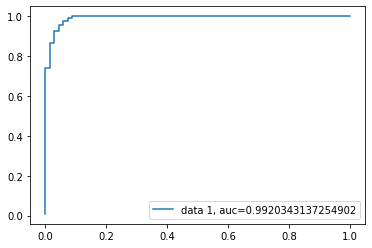

In [8]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
# Load Breast Cancer Dataset
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)
# Model
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Accuracy
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
#AUC Curve
# y_pred_proba = clf.predict_proba(X_test)[::,1]
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [14]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [13]:
 print(clf.predict_proba(X_test).shape, clf.predict_proba(X_test)[::,1].shape)

(188, 2) (188,)


In [5]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Auto-scikit learn:

Results:

Deployment approach:

Scaling Up:

Conclusion:

References: